# Football Player Value
# La mayoria de los jugadores de futbol mejor valorados juegan fuera de España.

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from pandas import json_normalize
import re
import json
import os

import time
import sys

In [8]:
#webscrapping de la web transfermarkt.
headers = {'User-Agent': 
           'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/47.0.2526.106 Safari/537.36'}

page = "https://www.transfermarkt.com/marktwertetop/wertvollstespieler"
pageTree = requests.get(page, headers=headers)
pageSoup = BeautifulSoup(pageTree.content, 'html.parser')

# Datos de la tabla

In [206]:
pageSoup

<!DOCTYPE html>

<html lang="en">
<head>
<script type="text/javascript">
    !function () { var e = function () { var e, t = "__tcfapiLocator", a = [], n = window; for (; n;) { try { if (n.frames[t]) { e = n; break } } catch (e) { } if (n === window.top) break; n = n.parent } e || (!function e() { var a = n.document, r = !!n.frames[t]; if (!r) if (a.body) { var i = a.createElement("iframe"); i.style.cssText = "display:none", i.name = t, a.body.appendChild(i) } else setTimeout(e, 5); return !r }(), n.__tcfapi = function () { for (var e, t = arguments.length, n = new Array(t), r = 0; r < t; r++)n[r] = arguments[r]; if (!n.length) return a; if ("setGdprApplies" === n[0]) n.length > 3 && 2 === parseInt(n[1], 10) && "boolean" == typeof n[3] && (e = n[3], "function" == typeof n[2] && n[2]("set", !0)); else if ("ping" === n[0]) { var i = { gdprApplies: e, cmpLoaded: !1, cmpStatus: "stub" }; "function" == typeof n[2] && n[2](i) } else a.push(n) }, n.addEventListener("message", (function (e) { 

# Data de los *Nombre de los Jugadores

In [ ]:
#start and end point
Players = pageSoup.find_all("img", {"class": "bilderrahmen-fixed"})

In [58]:
Players

[<img alt="Kylian Mbappé" class="bilderrahmen-fixed" src="https://img.a.transfermarkt.technology/portrait/small/342229-1632686046.jpg?lm=1" title="Kylian Mbappé"/>,
 <img alt="Erling Haaland" class="bilderrahmen-fixed" src="https://img.a.transfermarkt.technology/portrait/small/418560-1656179352.jpg?lm=1" title="Erling Haaland"/>,
 <img alt="Jude Bellingham" class="bilderrahmen-fixed" src="https://img.a.transfermarkt.technology/portrait/small/581678-1661412719.jpg?lm=1" title="Jude Bellingham"/>,
 <img alt="Vinicius Junior" class="bilderrahmen-fixed" src="https://img.a.transfermarkt.technology/portrait/small/371998-1664869583.jpg?lm=1" title="Vinicius Junior"/>,
 <img alt="Jamal Musiala" class="bilderrahmen-fixed" src="https://img.a.transfermarkt.technology/portrait/small/580195-1667830802.jpg?lm=1" title="Jamal Musiala"/>,
 <img alt="Bukayo Saka" class="bilderrahmen-fixed" src="https://img.a.transfermarkt.technology/portrait/small/433177-1669294809.jpg?lm=1" title="Bukayo Saka"/>,
 <im

In [55]:
Players[0]

<img alt="Kylian Mbappé" class="bilderrahmen-fixed" src="https://img.a.transfermarkt.technology/portrait/small/342229-1632686046.jpg?lm=1" title="Kylian Mbappé"/>

In [47]:
mbappe = Players[0]

mbappe_nombre = mbappe["alt"]
mbappe_nombre

'Kylian Mbappé'

In [57]:
#loop para realizar lo mismo que Mbappe con todos los elementos de la lista

for i in Players:
    print(i["alt"])

#comprehension list del loop

names = [i["alt"] for i in Players]
names

['Kylian Mbappé',
 'Erling Haaland',
 'Jude Bellingham',
 'Vinicius Junior',
 'Jamal Musiala',
 'Bukayo Saka',
 'Phil Foden',
 'Pedri',
 'Victor Osimhen',
 'Federico Valverde',
 'Gavi',
 'Aurélien Tchouaméni',
 'Harry Kane',
 'Enzo Fernández',
 'Florian Wirtz',
 'Khvicha Kvaratskhelia',
 'Rodrygo',
 'Lautaro Martínez',
 'Declan Rice',
 'Rodri',
 'Rafael Leão',
 'Christopher Nkunku',
 'Martin Ødegaard',
 'Marcus Rashford',
 'Bernardo Silva']

# Data de los *Equipos

In [74]:
Equipo = pageSoup.find_all("img", {"class":""})

In [76]:
Equipo

[<img alt="Paris Saint-Germain" class="" src="https://tmssl.akamaized.net/images/wappen/verysmall/583.png?lm=1522312728" title="Paris Saint-Germain"/>,
 <img alt="Manchester City" class="" src="https://tmssl.akamaized.net/images/wappen/verysmall/281.png?lm=1467356331" title="Manchester City"/>,
 <img alt="Borussia Dortmund" class="" src="https://tmssl.akamaized.net/images/wappen/verysmall/16.png?lm=1396275280" title="Borussia Dortmund"/>,
 <img alt="Real Madrid" class="" src="https://tmssl.akamaized.net/images/wappen/verysmall/418.png?lm=1580722449" title="Real Madrid"/>,
 <img alt="Bayern Munich" class="" src="https://tmssl.akamaized.net/images/wappen/verysmall/27.png?lm=1498251238" title="Bayern Munich"/>,
 <img alt="Arsenal FC" class="" src="https://tmssl.akamaized.net/images/wappen/verysmall/11.png?lm=1489787850" title="Arsenal FC"/>,
 <img alt="Manchester City" class="" src="https://tmssl.akamaized.net/images/wappen/verysmall/281.png?lm=1467356331" title="Manchester City"/>,
 <img

In [77]:
Equipo[0]

<img alt="Paris Saint-Germain" class="" src="https://tmssl.akamaized.net/images/wappen/verysmall/583.png?lm=1522312728" title="Paris Saint-Germain"/>

In [79]:
team = Equipo[0]
team_nombre = team ["alt"]

In [80]:
team_nombre

'Paris Saint-Germain'

In [ ]:
#loop para realizar lo mismo que Paris Saint Germain con todos los elementos de la lista

for i in Equipo:
    print(i["alt"])

#comprehension list del loop para los Equipos

nombres_equipo = [i["alt"] for i in Equipo]

In [82]:
nombres_equipo

['Paris Saint-Germain',
 'Manchester City',
 'Borussia Dortmund',
 'Real Madrid',
 'Bayern Munich',
 'Arsenal FC',
 'Manchester City',
 'FC Barcelona',
 'SSC Napoli',
 'Real Madrid',
 'FC Barcelona',
 'Real Madrid',
 'Tottenham Hotspur',
 'Chelsea FC',
 'Bayer 04 Leverkusen',
 'SSC Napoli',
 'Real Madrid',
 'Inter Milan',
 'West Ham United',
 'Manchester City',
 'AC Milan',
 'RB Leipzig',
 'Arsenal FC',
 'Manchester United',
 'Manchester City',
 'Kunshan FC',
 'Without Club',
 'Kunshan FC',
 'Without Club',
 'Guangzhou City (1995-2023)',
 'Without Club',
 'Omiya Ardija',
 'Sagan Tosu',
 'IFK Göteborg',
 'IFK Värnamo',
 'Transfermarkt']

In [116]:
equipos_nombre=nombres_equipo[: -11]
equipos_nombre

['Paris Saint-Germain',
 'Manchester City',
 'Borussia Dortmund',
 'Real Madrid',
 'Bayern Munich',
 'Arsenal FC',
 'Manchester City',
 'FC Barcelona',
 'SSC Napoli',
 'Real Madrid',
 'FC Barcelona',
 'Real Madrid',
 'Tottenham Hotspur',
 'Chelsea FC',
 'Bayer 04 Leverkusen',
 'SSC Napoli',
 'Real Madrid',
 'Inter Milan',
 'West Ham United',
 'Manchester City',
 'AC Milan',
 'RB Leipzig',
 'Arsenal FC',
 'Manchester United',
 'Manchester City']

In [100]:
Origen = pageSoup.find_all("img", {"class": "flaggenrahmen"})

In [101]:
Origen

[<img alt="France" class="flaggenrahmen" src="https://tmssl.akamaized.net/images/flagge/verysmall/50.png?lm=1520611569" title="France"/>,
 <img alt="Cameroon" class="flaggenrahmen" src="https://tmssl.akamaized.net/images/flagge/verysmall/31.png?lm=1520611569" title="Cameroon"/>,
 <img alt="Norway" class="flaggenrahmen" src="https://tmssl.akamaized.net/images/flagge/verysmall/125.png?lm=1520611569" title="Norway"/>,
 <img alt="England" class="flaggenrahmen" src="https://tmssl.akamaized.net/images/flagge/verysmall/189.png?lm=1520611569" title="England"/>,
 <img alt="Brazil" class="flaggenrahmen" src="https://tmssl.akamaized.net/images/flagge/verysmall/26.png?lm=1520611569" title="Brazil"/>,
 <img alt="Spain" class="flaggenrahmen" src="https://tmssl.akamaized.net/images/flagge/verysmall/157.png?lm=1520611569" title="Spain"/>,
 <img alt="Germany" class="flaggenrahmen" src="https://tmssl.akamaized.net/images/flagge/verysmall/40.png?lm=1520612525" title="Germany"/>,
 <img alt="England" class

In [102]:
Origen[0]

<img alt="France" class="flaggenrahmen" src="https://tmssl.akamaized.net/images/flagge/verysmall/50.png?lm=1520611569" title="France"/>

In [103]:
Origin = Origen[0]
paisnacimiento = Origin ["alt"]

In [104]:
paisnacimiento

'France'

In [106]:
#loop para realizar lo mismo que France con todos los elementos de la lista

for i in Origen:
    print(i["alt"])

#comprehension list del loop para la Nacionalidad

Origen_Jugador = [i["alt"] for i in Origen]

France
Cameroon
Norway
England
Brazil
Spain
Germany
England
England
Nigeria
England
Spain
Nigeria
Uruguay
Spain
Spain
France
Cameroon
England
Argentina
Germany
Georgia
Brazil
Spain
Argentina
England
Ireland
Spain
Portugal
Angola
France
DR Congo
Norway
England
St. Kitts & Nevis
Portugal


In [107]:
import pandas as pd

# Creamos Dataframe de los datos de 'Jugadores' y 'Equipo'

In [117]:
df_1 = {'Jugador':names,'Equipo':equipos_nombre}

In [118]:
df_futbol = pd.DataFrame(df_1)

In [119]:
df_futbol

,Jugador,Equipo
0,Kylian Mbappé,Paris Saint-Germain
1,Erling Haaland,Manchester City
2,Jude Bellingham,Borussia Dortmund
3,Vinicius Junior,Real Madrid
4,Jamal Musiala,Bayern Munich
5,Bukayo Saka,Arsenal FC
6,Phil Foden,Manchester City
7,Pedri,FC Barcelona
8,Victor Osimhen,SSC Napoli
9,Federico Valverde,Real Madrid


In [120]:
df_futbol['País']

KeyError: 'País'

In [121]:
for i in equipos_nombre:
    if i is ()

['Paris Saint-Germain',
 'Manchester City',
 'Borussia Dortmund',
 'Real Madrid',
 'Bayern Munich',
 'Arsenal FC',
 'Manchester City',
 'FC Barcelona',
 'SSC Napoli',
 'Real Madrid',
 'FC Barcelona',
 'Real Madrid',
 'Tottenham Hotspur',
 'Chelsea FC',
 'Bayer 04 Leverkusen',
 'SSC Napoli',
 'Real Madrid',
 'Inter Milan',
 'West Ham United',
 'Manchester City',
 'AC Milan',
 'RB Leipzig',
 'Arsenal FC',
 'Manchester United',
 'Manchester City']

# Crear un diccionario y después función para crear columna nueva del país del equipo

In [192]:
#Diccionario para asignar equipo al Pais

paisdelequipo = {"Manchester United":"UK",
              "Manchester City":"UK",
              "Arsenal FC":"UK",
              "West Ham United":"UK",
                 "Tottenham Hotspur": "UK",
             "Chelsea FC":"UK",
         "Paris Saint-Germain":"Francia" ,
        "RB Leipzig":"Alemania",
       "Bayern Munich": "Alemania",
         "Borussia Dortmund":"Alemania",
         "Bayer 04 Leverkusen":"Alemania",
         "FC Barcelona":"España",
         "Real Madrid":"España", 
        "AC Milan": "Italia",
        "SSC Napoli":"Italia",
               "Inter Milan":"Italia" }

print(paisdelequipo)

{'Manchester United': 'UK', 'Manchester City': 'UK', 'Arsenal FC': 'UK', 'West Ham United': 'UK', 'Tottenham Hotspur': 'UK', 'Chelsea FC': 'UK', 'Paris Saint-Germain': 'Francia', 'RB Leipzig': 'Alemania', 'Bayern Munich': 'Alemania', 'Borussia Dortmund': 'Alemania', 'Bayer 04 Leverkusen': 'Alemania', 'FC Barcelona': 'España', 'Real Madrid': 'España', 'AC Milan': 'Italia', 'SSC Napoli': 'Italia', 'Inter Milan': 'Italia'}


In [193]:
df_futbol

,Jugador,Equipo,PaisDelEquipo
0,Kylian Mbappé,Paris Saint-Germain,Francia
1,Erling Haaland,Manchester City,UK
2,Jude Bellingham,Borussia Dortmund,Alemania
3,Vinicius Junior,Real Madrid,España
4,Jamal Musiala,Bayern Munich,Alemania
5,Bukayo Saka,Arsenal FC,UK
6,Phil Foden,Manchester City,UK
7,Pedri,FC Barcelona,España
8,Victor Osimhen,SSC Napoli,Italia
9,Federico Valverde,Real Madrid,España


In [194]:
#función!
def c_pais(Equipo):
    for key, value in paisdelequipo.items():
        if Equipo in key:
            return value

In [195]:
#creo la columna nueva
df_futbol["PaisDelEquipo"] = df_futbol["Equipo"].apply(c_pais)

In [196]:
df_futbol

,Jugador,Equipo,PaisDelEquipo
0,Kylian Mbappé,Paris Saint-Germain,Francia
1,Erling Haaland,Manchester City,UK
2,Jude Bellingham,Borussia Dortmund,Alemania
3,Vinicius Junior,Real Madrid,España
4,Jamal Musiala,Bayern Munich,Alemania
5,Bukayo Saka,Arsenal FC,UK
6,Phil Foden,Manchester City,UK
7,Pedri,FC Barcelona,España
8,Victor Osimhen,SSC Napoli,Italia
9,Federico Valverde,Real Madrid,España


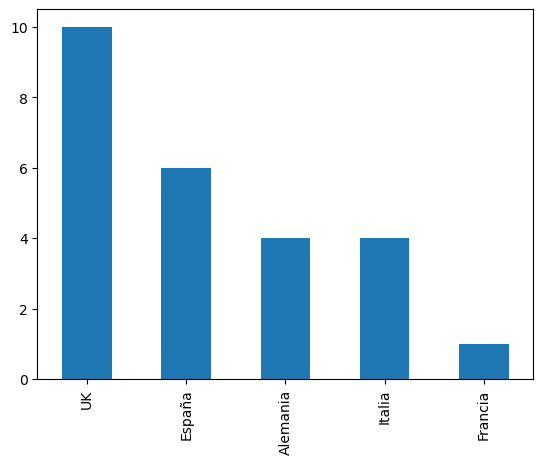

In [205]:
#Visualización
import seaborn as sns

import matplotlib.pyplot as plt

df_futbol['PaisDelEquipo'].value_counts().plot.bar();

In [207]:
#Tanto por ciento del pais más representado
quotient = 10 / 25
percent_UK= quotient * 100

print(percent_UK)


40.0


# Conclusiones


A pesar de que dentro de los 25 jugadores más valorados hay 6 de España.
Durante estos últimos años UK ha adelantado en todos los niveles a nuestro Pais.
Más dinero / Mucho dinero de los paises arabes y catarís y todo lo que conlleva


# Con más tiempo:

Sacar información de los más jugadores (los 100 con más valor en el mercado)
Conclusiones más significativas
Poder pasar la data a un mapa de Europa (Points Map)
Zip para juntar dos listas.